In [21]:
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
import keras
import sys, time, os, warnings 
import numpy as np
import pandas as pd 
from collections import Counter 
warnings.filterwarnings("ignore")

In [22]:

## The location of the Flickr8K_ images
images_dir = "../data/viecap4h-public-train/viecap4h-public-train/images_train/"
## The location of the caption file
captions_dir = "../data/train_captions.csv"

jpgs = os.listdir(images_dir)
print("The number of jpg flies in viecap4h: {}".format(len(jpgs)))

The number of jpg flies in viecap4h: 8032


In [23]:
df = pd.read_csv(captions_dir)

uni_filenames = np.unique(df.id.values)
print("The number of unique file names : {}".format(len(uni_filenames)))
print("The distribution of the number of captions for each image:")
Counter(Counter(df.id.values).values())
print(df[:5])

The number of unique file names : 8032
The distribution of the number of captions for each image:
   Unnamed: 0              id  \
0           0  EA920B1A56.jpg   
1           1  EA920B1A56.jpg   
2           2  FA1D05EEF6.jpg   
3           3  FA1D05EEF6.jpg   
4           4  5597E765A5.jpg   

                                            captions  
0          Bác sĩ đang tiến hành tiêm cho người dân.  
1              Một người đang được tiêm vào bắp tay.  
2                     Người phụ nữ đang đeo máy thở.  
3  Bệnh nhân đang được các y bác sĩ điều trị bằng...  
4  Bệnh nhân đang được điều trị tích cực tại bệnh...  


# load some image

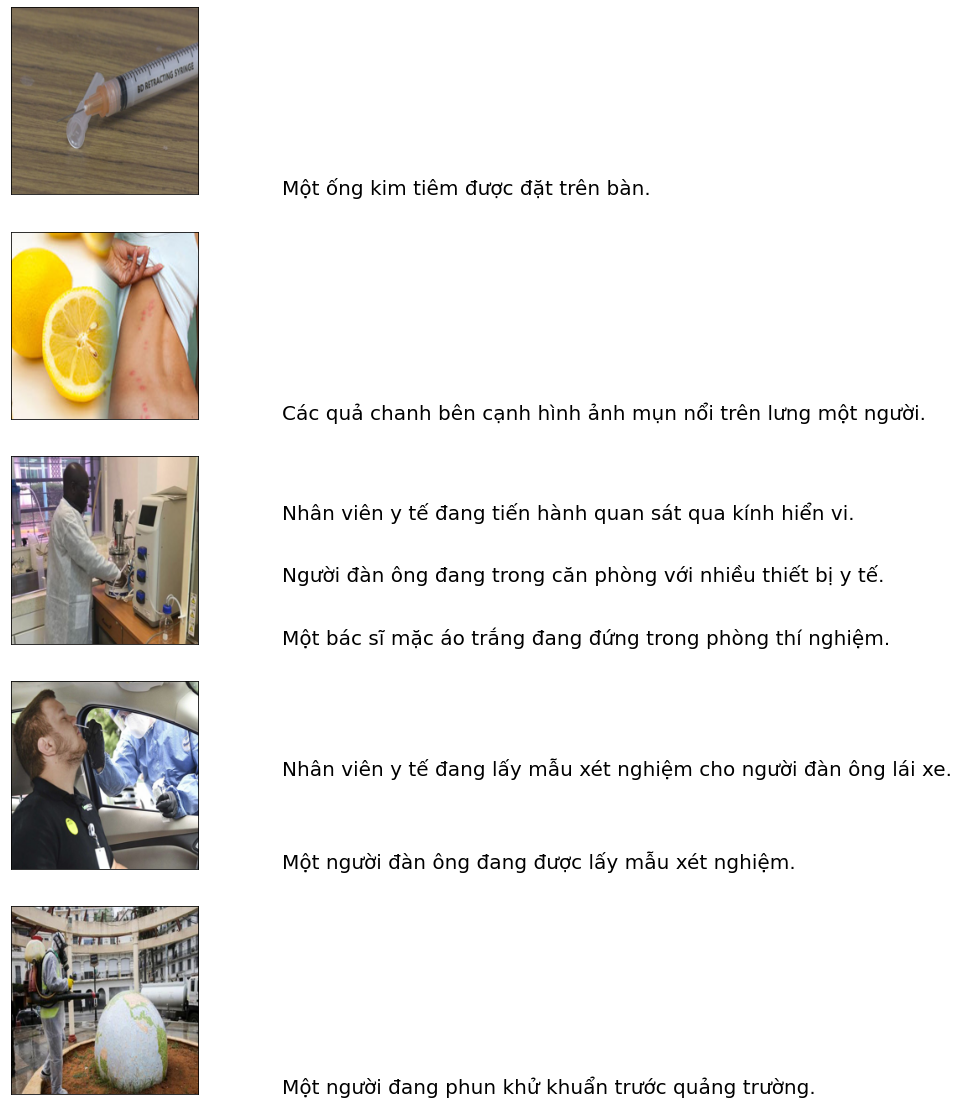

In [24]:
from keras.preprocessing.image import load_img, img_to_array
from IPython.display import display
from PIL import Image

npic = 5 # Displaying 5 images from the dataset
npix = 224
target_size = (npix,npix,3)

count = 1
fig = plt.figure(figsize=(10,20))
for jpgfnm in uni_filenames[-5:]:
    filename = images_dir + '/' + jpgfnm
    captions = list(df["captions"].loc[df["id"]==jpgfnm].values)
    image_load = load_img(filename, target_size=target_size)
    
    ax = fig.add_subplot(npic,2,count,xticks=[],yticks=[])
    ax.imshow(image_load)
    count += 1
    
    ax = fig.add_subplot(npic,2,count)
    plt.axis('off')
    ax.plot()
    ax.set_xlim(0,1)
    ax.set_ylim(0,len(captions))
    for i, caption in enumerate(captions):
        ax.text(0,i,caption,fontsize=20)
    count += 1
plt.show()

# Clean captions for further research

In [25]:
# Defining a function to calculate the top 5 words in all the captions available for the images
def df_word(df):
    vocabulary = []
    for txt in df.captions.values:
        vocabulary.extend(txt.split())
    print('Vocabulary Size: %d' % len(set(vocabulary)))
    ct = Counter(vocabulary)
    dfword = pd.DataFrame({"word":list(ct.keys()),"count":list(ct.values())})
    dfword = dfword.sort_values("count",ascending=False)
    dfword = dfword.reset_index()[["word","count"]]
    return(dfword)
dfword = df_word(df)
dfword.head(5)

Vocabulary Size: 2537


,word,count
0,đang,6273
1,người,3864
2,Một,3548
3,một,2806
4,viên,2045


In [27]:

import string

print("\nLowercase..")
def lowercase(text_original):
    text_lower = text_original.lower()
    return(text_lower)

print("\nRemove punctuations..")
def remove_punctuation(text_original):
    text_no_punctuation = text_original.translate(str.maketrans('','',string.punctuation))
    return(text_no_punctuation)



print("\nRemove a single character word..")
def remove_single_character(text):
    text_len_more_than1 = ""
    for word in text.split():
        if len(word) > 1:
            text_len_more_than1 += " " + word
    return(text_len_more_than1)


print("\nRemove words with numeric values..")
def remove_numeric(text,printTF=False):
    text_no_numeric = ""
    for word in text.split():
        isalpha = word.isalpha()
        if printTF:
            print("    {:10} : {:}".format(word,isalpha))
        if isalpha:
            text_no_numeric += " " + word
    return(text_no_numeric)


Lowercase..

Remove punctuations..

Remove a single character word..

Remove words with numeric values..


In [28]:

def text_clean(text_original):
    text = lowercase(text_original)
    text = remove_punctuation(text)
    # text = remove_single_character(text)
    text = remove_numeric(text)
    return(text)


for i, caption in enumerate(df.captions.values):
    newcaption = text_clean(caption)
    df["captions"].iloc[i] = newcaption

# Plotting the top 50 words that appear in the cleaned dataset

Vocabulary Size: 1619


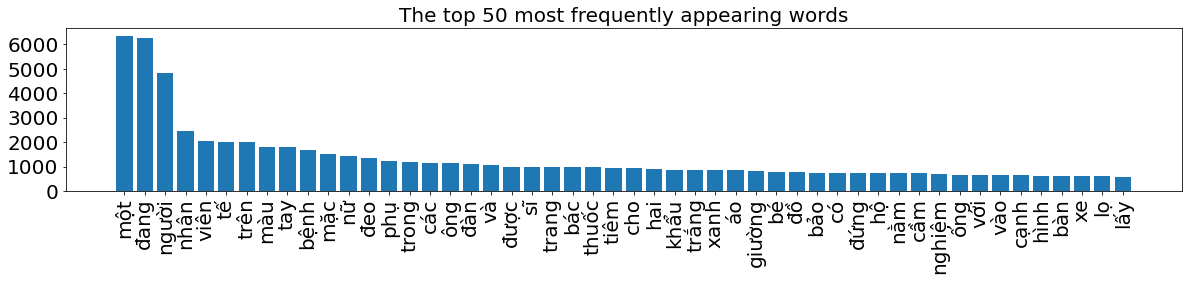

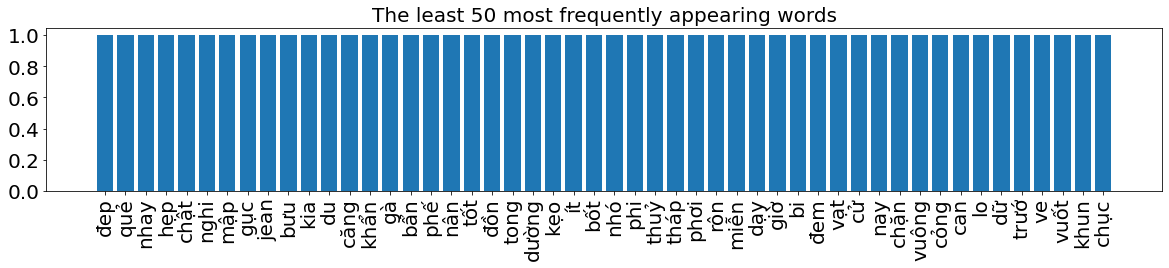

In [29]:
topn = 50

def plthist(dfsub, title="The top 50 most frequently appearing words"):
    plt.figure(figsize=(20,3))
    plt.bar(dfsub.index,dfsub["count"])
    plt.yticks(fontsize=20)
    plt.xticks(dfsub.index,dfsub["word"],rotation=90,fontsize=20)
    plt.title(title,fontsize=20)
    plt.show()
dfword = df_word(df)
plthist(dfword.iloc[:topn,:],
        title="The top 50 most frequently appearing words")
plthist(dfword.iloc[-topn:,:],
        title="The least 50 most frequently appearing words")